# Spatiotemporal ARIMA Example
This notebook demonstrates fitting a simple ARIMA model with seasonal components for simulated spatiotemporal data.

/var/folders/2j/plzn1x294gl71tmqqx6y8yxm0000gn/T/ipykernel_17987/3086836972.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


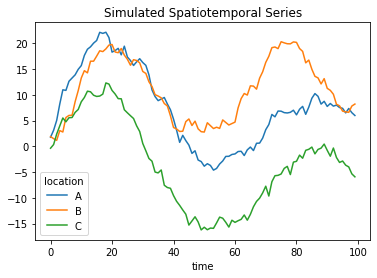

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Simulate spatiotemporal data
np.random.seed(0)
T = 100
locations = ['A','B','C']
data = []
for loc in locations:
    y = np.cumsum(np.random.randn(T)) + 10*np.sin(np.linspace(0, 3*np.pi, T))
    data.append(pd.DataFrame({'time': np.arange(T), 'location': loc, 'value': y}))
df = pd.concat(data)

df_pivot = df.pivot(index='time', columns='location', values='value')
df_pivot.plot(title="Simulated Spatiotemporal Series")
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      A   No. Observations:                  100
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -144.927
Date:                Wed, 27 Aug 2025   AIC                            299.854
Time:                        21:26:32   BIC                            312.829
Sample:                             0   HQIC                           305.103
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1475      0.968      0.152      0.879      -1.749       2.044
ar.L2          0.7570      0.930      0.814      0.416      -1.065       2.579
ma.L1          0.0197      0.998      0.020      0.9

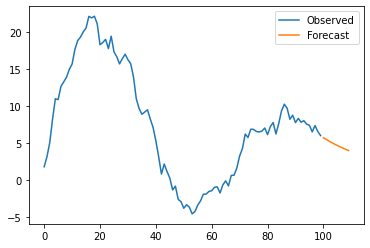

In [2]:
# Fit ARIMA for one location
series = df_pivot['A']
model = ARIMA(series, order=(2,1,2))
fit = model.fit()
print(fit.summary())

# Forecast
forecast = fit.forecast(steps=10)
plt.plot(series.index, series, label='Observed')
plt.plot(np.arange(len(series), len(series)+10), forecast, label='Forecast')
plt.legend()
plt.show()